In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from datetime import date, datetime,timedelta
import math

plt.style.use('default')

In [2]:
_FIRST_CLEAN_DATASETS_DIRECTORY = './datasets/cepagri/first-clean-csvs'
_111_DATASET_FILE_NAME = '111.csv'
_111_DATASET_FILE_PATH = _FIRST_CLEAN_DATASETS_DIRECTORY + '/' + _111_DATASET_FILE_NAME

In [3]:
_DATE_COLUMN = 'Data'
_TEMPERATURE_COLUMN = 'Temperatura do Ar Média (°C)'
_MAX_TEMP_COLUMN = 'Temperatura do Ar Máxima (°C)'
_MIN_TEMP_COLUMN = 'Temperatura do Ar Mínima (°C)'
_VARIATION_TEMP_COLUMN = 'Variação da Temperatura do Ar (°C)'
_HUMIDITY_COLUMN = 'Umidade relativa Média (%)'
_MAX_HUMIDITY_COLUMN = 'Umidade relativa Máxima (%)'
_MIN_HUMIDITY_COLUMN = 'Umidade relativa Mínima (%)'
_VARIATION_HUMIDITY_COLUMN = 'Variação da Umidade relativa (%)'
_PRESSURE_COLUMN = 'Pressão (hPa)'
_MAX_PRESSURE_COLUMN = 'Pressão Máxima (hPa)'
_MIN_PRESSURE_COLUMN = 'Pressão Mínima (hPa)'
_VARIATION_PRESSURE_COLUMN = 'Variação da Pressão (hPa)'
_YEAR_COLUMN = 'Ano'
_MONTH_COLUMN = 'Mês'
_DAY_COLUMN = 'Dia'
_DAY_OF_YEAR_COLUMN = 'Dia Juliano'
_SEASON_COLUMN = 'Estação Metereológica do Ano'
_SEASON_SUMMER = 'Verão'
_SEASON_WINTER = 'Inverno'
_SEASON_SPRING = 'Primavera'
_SEASON_AUTUMN = 'Outono'
_QUANTILE_MAX_TEMP_FIFTEEN_DAYS_COLUMN = 'Percentil Temperatura Max (15 dias)'
_QUANTILE_MIN_TEMP_FIFTEEN_DAYS_COLUMN = 'Percentil Temperatura Min (15 dias)'

In [4]:
data_frame = pd.read_csv(_111_DATASET_FILE_PATH, encoding="latin-1")

/home/felipepedroso/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data_frame.shape

(1046641, 19)

In [6]:
data_frame.columns

Index(['Cod', 'Ano', 'Dia Juliano', 'Hora - minuto',
       'Veloc. Instantânea do Vento a 5 metros (m/s)',
       'Veloc. Instantânea do Vento a 2 metros (m/s)',
       'Direção do Vento no instante da aquisição (°)',
       'Radiação Incidente total de 10 leituras (KW/m2)',
       'Radiação Refletida Total de 10 leituras (KW/m2)',
       'Fluxo Positivo de calor no solo total de 10 leituras (W/m2)',
       'Fluxo negativo de calor no solo . total de 10 leituras (W/m2)',
       'Umidade relativa Média (%)', 'Temperatura do Ar Média (°C)',
       'Temperatura do solo  1 Média (°C) à 3cm no solo',
       'Temperatura do solo 2Média (°C) à 6cm no solo ',
       'Temperatura do solo 3Média (°C) Colocado sensor de UV em 31/07/09',
       'Pressão (hPa)', 'Chuva total do período (mm)', 'Data'],
      dtype='object')

### Extracting daily information

In [7]:
daily_analysis_columns = [_TEMPERATURE_COLUMN,_HUMIDITY_COLUMN,_PRESSURE_COLUMN]

In [8]:
daily_average_from_columns = data_frame.groupby(_DATE_COLUMN)[daily_analysis_columns].mean()
daily_average_from_columns.head()

,Temperatura do Ar Média (°C),Umidade relativa Média (%),Pressão (hPa)
Data,,,
1997-01-01,22.875903,80.237222,942.916667
1997-01-02,21.545625,79.303194,943.861111
1997-01-03,20.179444,82.070000,945.409722
1997-01-04,22.125833,83.748333,943.194444
1997-01-05,23.178958,84.473542,942.729167


In [9]:
daily_max_from_columns = data_frame.groupby(_DATE_COLUMN)[daily_analysis_columns].max()
new_column_names = [_MAX_TEMP_COLUMN,_MAX_HUMIDITY_COLUMN,_MAX_PRESSURE_COLUMN]
daily_max_from_columns.columns = new_column_names
daily_max_from_columns.head()

,Temperatura do Ar Máxima (°C),Umidade relativa Máxima (%),Pressão Máxima (hPa)
Data,,,
1997-01-01,29.39,98.1,945.0
1997-01-02,25.93,88.7,947.0
1997-01-03,25.17,95.0,947.0
1997-01-04,29.21,100.0,946.0
1997-01-05,30.46,100.0,945.0


In [10]:
daily_min_from_columns = data_frame.groupby(_DATE_COLUMN)[daily_analysis_columns].min()
new_column_names = [_MIN_TEMP_COLUMN,_MIN_HUMIDITY_COLUMN,_MIN_PRESSURE_COLUMN]
daily_min_from_columns.columns = new_column_names
daily_min_from_columns.head()

,Temperatura do Ar Mínima (°C),Umidade relativa Mínima (%),Pressão Mínima (hPa)
Data,,,
1997-01-01,18.53,58.77,940.0
1997-01-02,19.21,66.41,942.0
1997-01-03,17.88,67.79,944.0
1997-01-04,17.85,56.78,941.0
1997-01-05,18.06,57.30,940.0


In [11]:
daily_analysis_data_frame = pd.merge(daily_max_from_columns,daily_min_from_columns, on=_DATE_COLUMN)
daily_analysis_data_frame = pd.merge(daily_analysis_data_frame, daily_average_from_columns, on=_DATE_COLUMN)
daily_analysis_data_frame.head()

,Temperatura do Ar Máxima (°C),Umidade relativa Máxima (%),Pressão Máxima (hPa),Temperatura do Ar Mínima (°C),Umidade relativa Mínima (%),Pressão Mínima (hPa),Temperatura do Ar Média (°C),Umidade relativa Média (%),Pressão (hPa)
Data,,,,,,,,,
1997-01-01,29.39,98.1,945.0,18.53,58.77,940.0,22.875903,80.237222,942.916667
1997-01-02,25.93,88.7,947.0,19.21,66.41,942.0,21.545625,79.303194,943.861111
1997-01-03,25.17,95.0,947.0,17.88,67.79,944.0,20.179444,82.070000,945.409722
1997-01-04,29.21,100.0,946.0,17.85,56.78,941.0,22.125833,83.748333,943.194444
1997-01-05,30.46,100.0,945.0,18.06,57.30,940.0,23.178958,84.473542,942.729167


In [12]:
daily_analysis_data_frame[_VARIATION_TEMP_COLUMN] = daily_analysis_data_frame[_MAX_TEMP_COLUMN]-daily_analysis_data_frame[_MIN_TEMP_COLUMN]
daily_analysis_data_frame[_VARIATION_HUMIDITY_COLUMN] = daily_analysis_data_frame[_MAX_HUMIDITY_COLUMN]-daily_analysis_data_frame[_MIN_HUMIDITY_COLUMN]
daily_analysis_data_frame[_VARIATION_PRESSURE_COLUMN] = daily_analysis_data_frame[_MAX_PRESSURE_COLUMN]-daily_analysis_data_frame[_MIN_PRESSURE_COLUMN]
daily_analysis_data_frame.head()

,Temperatura do Ar Máxima (°C),Umidade relativa Máxima (%),Pressão Máxima (hPa),Temperatura do Ar Mínima (°C),Umidade relativa Mínima (%),Pressão Mínima (hPa),Temperatura do Ar Média (°C),Umidade relativa Média (%),Pressão (hPa),Variação da Temperatura do Ar (°C),Variação da Umidade relativa (%),Variação da Pressão (hPa)
Data,,,,,,,,,,,,
1997-01-01,29.39,98.1,945.0,18.53,58.77,940.0,22.875903,80.237222,942.916667,10.86,39.33,5.0
1997-01-02,25.93,88.7,947.0,19.21,66.41,942.0,21.545625,79.303194,943.861111,6.72,22.29,5.0
1997-01-03,25.17,95.0,947.0,17.88,67.79,944.0,20.179444,82.070000,945.409722,7.29,27.21,3.0
1997-01-04,29.21,100.0,946.0,17.85,56.78,941.0,22.125833,83.748333,943.194444,11.36,43.22,5.0
1997-01-05,30.46,100.0,945.0,18.06,57.30,940.0,23.178958,84.473542,942.729167,12.40,42.70,5.0


In [13]:
daily_analysis_data_frame.index = pd.to_datetime(daily_analysis_data_frame.index, format='%Y-%m-%d', utc=True)
daily_analysis_data_frame[_DAY_OF_YEAR_COLUMN] = daily_analysis_data_frame.index.map(lambda date: date.timetuple().tm_yday)
daily_analysis_data_frame[_YEAR_COLUMN] = daily_analysis_data_frame.index.map(lambda date: date.year)
daily_analysis_data_frame[_MONTH_COLUMN] = daily_analysis_data_frame.index.map(lambda date: date.month)
daily_analysis_data_frame[_DAY_COLUMN] = daily_analysis_data_frame.index.map(lambda date: date.day)

In [14]:
# Reference: https://stackoverflow.com/questions/16139306/determine-season-given-timestamp-in-python-using-datetime
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons_intervals = [
   (_SEASON_SUMMER, (date(Y,  1,  1),  date(Y,  2, 29))),
   (_SEASON_AUTUMN, (date(Y,  3, 1),  date(Y,  5, 31))),
   (_SEASON_WINTER, (date(Y,  6, 1),  date(Y,  8, 31))),
   (_SEASON_SPRING, (date(Y,  9, 1),  date(Y, 11, 30))),
   (_SEASON_SUMMER, (date(Y, 12, 1),  date(Y, 12, 31)))
]

def get_season(timestamp):
    if isinstance(timestamp, datetime):
        timestamp = timestamp.date()
    timestamp = timestamp.replace(year=Y)
    return next(season for season, (start, end) in seasons_intervals
                if start <= timestamp <= end)

daily_analysis_data_frame[_SEASON_COLUMN] = daily_analysis_data_frame.index.map(lambda date: get_season(date))

In [15]:
min_amount_days_window = 15
window_delta_amount = math.ceil((min_amount_days_window / 2)-1)
window_delta = timedelta(days=window_delta_amount)
quantile_value = 0.9

def get_quantile(index, column):
    begin_date = index - window_delta
    end_date = index + window_delta
    data_window = daily_analysis_data_frame.loc[begin_date:end_date]
    return data_window[column].quantile(quantile_value)

daily_analysis_data_frame[_QUANTILE_MAX_TEMP_FIFTEEN_DAYS_COLUMN] = daily_analysis_data_frame.index.map(lambda index: get_quantile(index, _MAX_TEMP_COLUMN))

daily_analysis_data_frame[_QUANTILE_MIN_TEMP_FIFTEEN_DAYS_COLUMN] = daily_analysis_data_frame.index.map(lambda index: get_quantile(index,_MIN_TEMP_COLUMN))

daily_analysis_data_frame.head()

,Temperatura do Ar Máxima (°C),Umidade relativa Máxima (%),Pressão Máxima (hPa),Temperatura do Ar Mínima (°C),Umidade relativa Mínima (%),Pressão Mínima (hPa),Temperatura do Ar Média (°C),Umidade relativa Média (%),Pressão (hPa),Variação da Temperatura do Ar (°C),Variação da Umidade relativa (%),Variação da Pressão (hPa),Dia Juliano,Ano,Mês,Dia,Estação Metereológica do Ano,Percentil Temperatura Max (15 dias),Percentil Temperatura Min (15 dias)
Data,,,,,,,,,,,,,,,,,,,
1997-01-01 00:00:00+00:00,29.39,98.1,945.0,18.53,58.77,940.0,22.875903,80.237222,942.916667,10.86,39.33,5.0,1,1997,1,1,Verão,31.974,19.234
1997-01-02 00:00:00+00:00,25.93,88.7,947.0,19.21,66.41,942.0,21.545625,79.303194,943.861111,6.72,22.29,5.0,2,1997,1,2,Verão,31.866,19.226
1997-01-03 00:00:00+00:00,25.17,95.0,947.0,17.88,67.79,944.0,20.179444,82.070000,945.409722,7.29,27.21,3.0,3,1997,1,3,Verão,31.758,19.218
1997-01-04 00:00:00+00:00,29.21,100.0,946.0,17.85,56.78,941.0,22.125833,83.748333,943.194444,11.36,43.22,5.0,4,1997,1,4,Verão,31.650,19.210
1997-01-05 00:00:00+00:00,30.46,100.0,945.0,18.06,57.30,940.0,23.178958,84.473542,942.729167,12.40,42.70,5.0,5,1997,1,5,Verão,31.583,19.282


In [16]:
# Reordering columns
_COLUMN_ORDER = [
    _YEAR_COLUMN,
    _MONTH_COLUMN,
    _DAY_COLUMN,
    _DAY_OF_YEAR_COLUMN,
    _SEASON_COLUMN,
    _TEMPERATURE_COLUMN, 
    _MAX_TEMP_COLUMN, 
    _MIN_TEMP_COLUMN, 
    _VARIATION_TEMP_COLUMN,
    _QUANTILE_MAX_TEMP_FIFTEEN_DAYS_COLUMN,
    _QUANTILE_MIN_TEMP_FIFTEEN_DAYS_COLUMN,
    _HUMIDITY_COLUMN, 
    _MAX_HUMIDITY_COLUMN,
    _MIN_HUMIDITY_COLUMN,
    _VARIATION_HUMIDITY_COLUMN,
    _PRESSURE_COLUMN,
    _MAX_PRESSURE_COLUMN,
    _MIN_PRESSURE_COLUMN,
    _VARIATION_PRESSURE_COLUMN
]
daily_analysis_data_frame = daily_analysis_data_frame[_COLUMN_ORDER]

In [17]:
# Saving daily analysis
_OUTPUT_DIRECTORY = './datasets/cepagri/daily_analisys'
if not os.path.isdir(_OUTPUT_DIRECTORY):
    os.mkdir(_OUTPUT_DIRECTORY)
_OUTPUT_PATH = _OUTPUT_DIRECTORY + '/daily_' + _111_DATASET_FILE_NAME
daily_analysis_data_frame.to_csv(_OUTPUT_PATH , index = True, encoding='utf-8')

In [18]:
daily_analysis_data_frame.head()

,Ano,Mês,Dia,Dia Juliano,Estação Metereológica do Ano,Temperatura do Ar Média (°C),Temperatura do Ar Máxima (°C),Temperatura do Ar Mínima (°C),Variação da Temperatura do Ar (°C),Percentil Temperatura Max (15 dias),Percentil Temperatura Min (15 dias),Umidade relativa Média (%),Umidade relativa Máxima (%),Umidade relativa Mínima (%),Variação da Umidade relativa (%),Pressão (hPa),Pressão Máxima (hPa),Pressão Mínima (hPa),Variação da Pressão (hPa)
Data,,,,,,,,,,,,,,,,,,,
1997-01-01 00:00:00+00:00,1997,1,1,1,Verão,22.875903,29.39,18.53,10.86,31.974,19.234,80.237222,98.1,58.77,39.33,942.916667,945.0,940.0,5.0
1997-01-02 00:00:00+00:00,1997,1,2,2,Verão,21.545625,25.93,19.21,6.72,31.866,19.226,79.303194,88.7,66.41,22.29,943.861111,947.0,942.0,5.0
1997-01-03 00:00:00+00:00,1997,1,3,3,Verão,20.179444,25.17,17.88,7.29,31.758,19.218,82.070000,95.0,67.79,27.21,945.409722,947.0,944.0,3.0
1997-01-04 00:00:00+00:00,1997,1,4,4,Verão,22.125833,29.21,17.85,11.36,31.650,19.210,83.748333,100.0,56.78,43.22,943.194444,946.0,941.0,5.0
1997-01-05 00:00:00+00:00,1997,1,5,5,Verão,23.178958,30.46,18.06,12.40,31.583,19.282,84.473542,100.0,57.30,42.70,942.729167,945.0,940.0,5.0


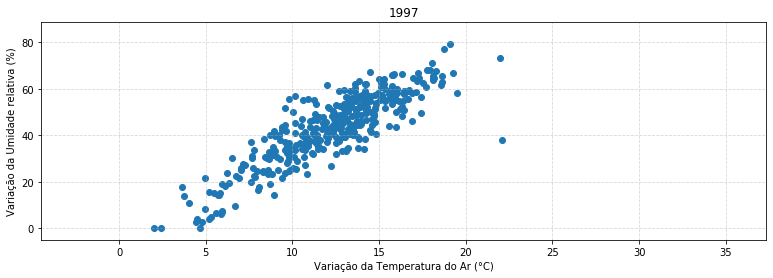

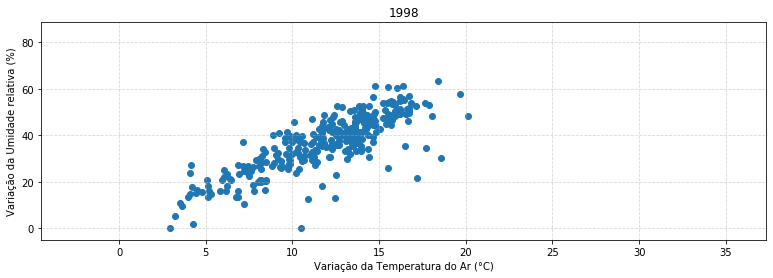

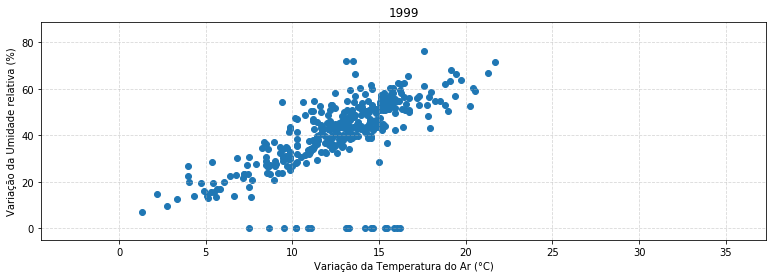

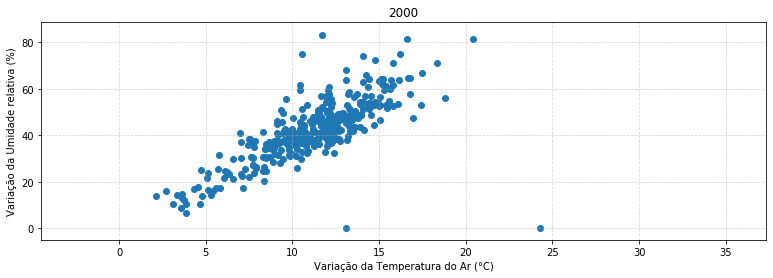

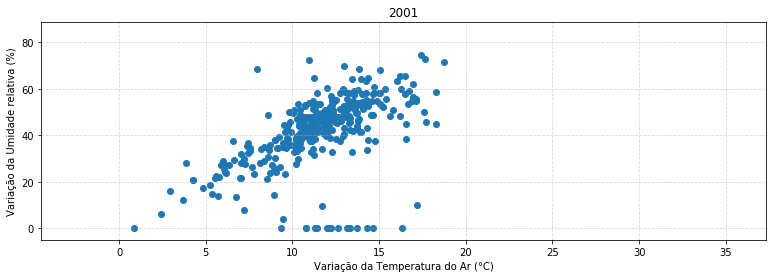

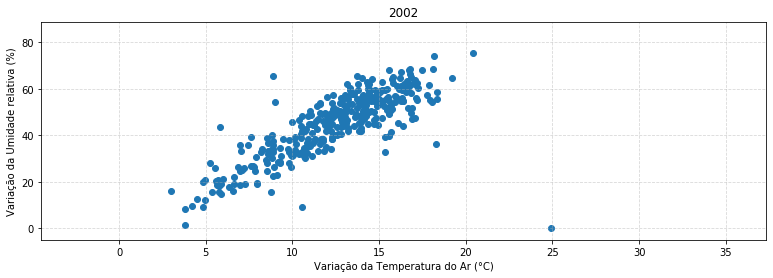

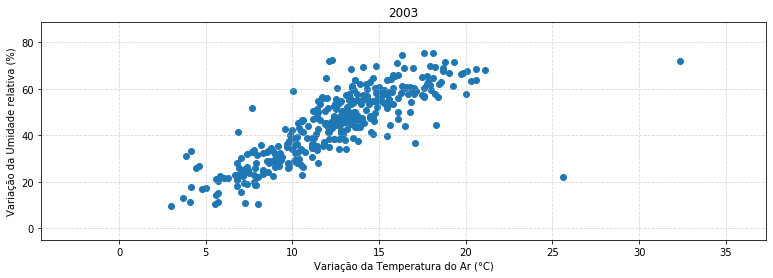

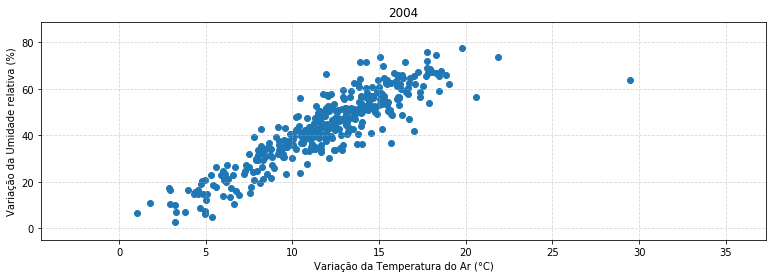

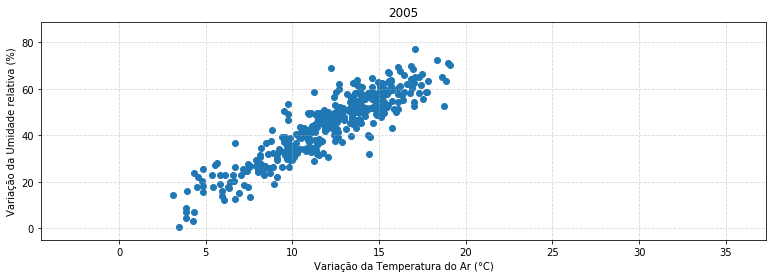

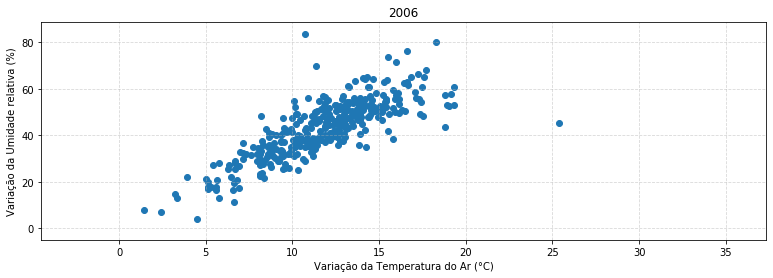

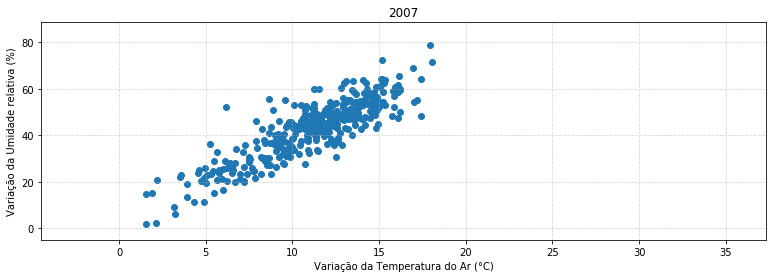

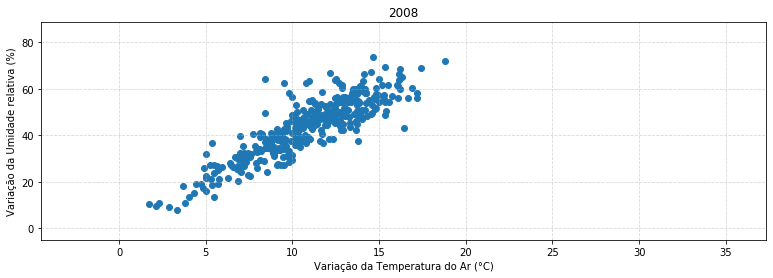

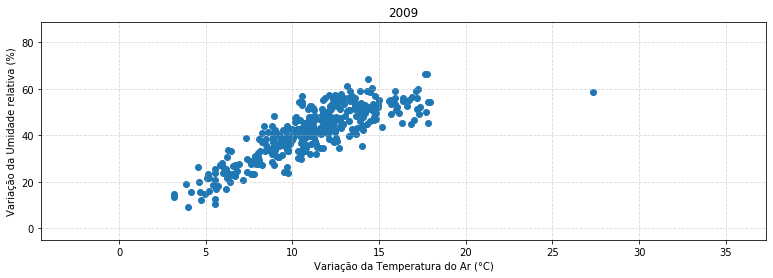

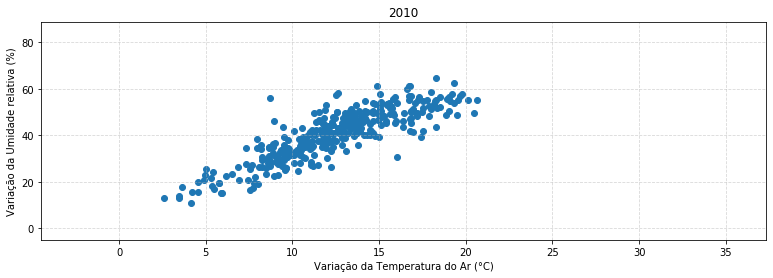

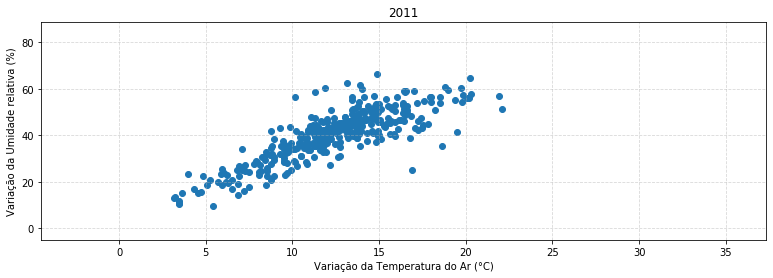

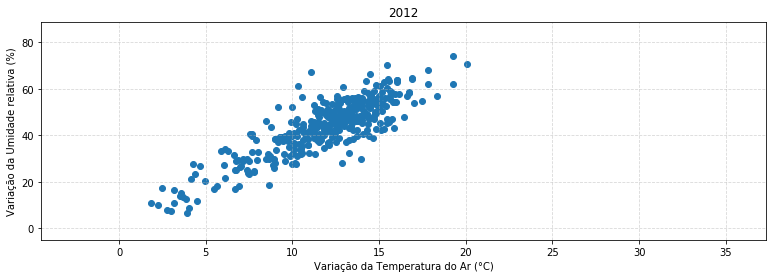

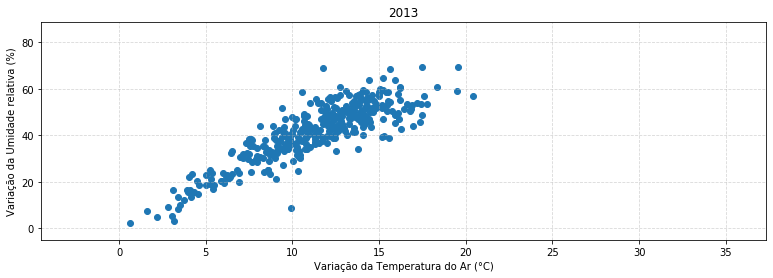

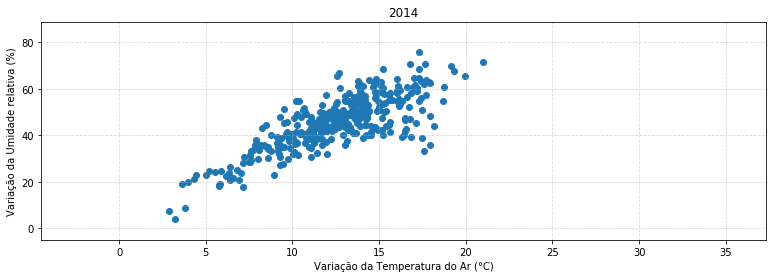

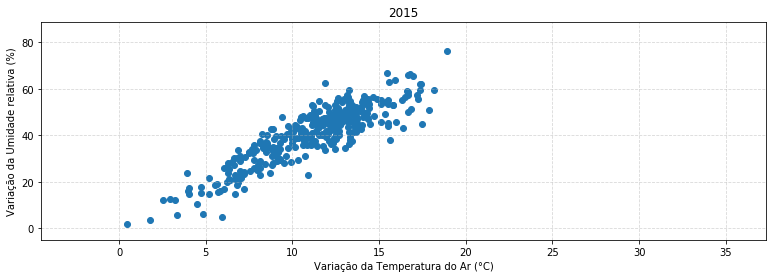

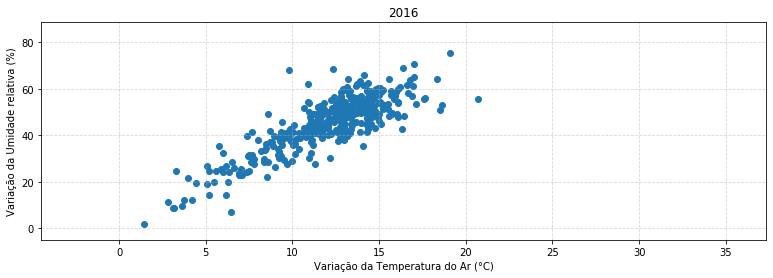

In [19]:
min_x_value = daily_analysis_data_frame[_VARIATION_TEMP_COLUMN].min() - 5
max_x_value = daily_analysis_data_frame[_VARIATION_TEMP_COLUMN].max() + 5

min_y_value = daily_analysis_data_frame[_VARIATION_HUMIDITY_COLUMN].min() - 5
max_y_value = daily_analysis_data_frame[_VARIATION_HUMIDITY_COLUMN].max() + 5

for i in daily_analysis_data_frame[_YEAR_COLUMN].unique():
    data_2plot = daily_analysis_data_frame[(daily_analysis_data_frame[_YEAR_COLUMN] == i)]

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.scatter(data_2plot[_VARIATION_TEMP_COLUMN], data_2plot[_VARIATION_HUMIDITY_COLUMN])
    plt.xlabel(_VARIATION_TEMP_COLUMN)
    plt.ylabel(_VARIATION_HUMIDITY_COLUMN)
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

In [20]:
daily_analysis_data_frame[[_VARIATION_TEMP_COLUMN,_VARIATION_HUMIDITY_COLUMN]].corr()


,Variação da Temperatura do Ar (°C),Variação da Umidade relativa (%)
Variação da Temperatura do Ar (°C),1.000000,0.797725
Variação da Umidade relativa (%),0.797725,1.000000


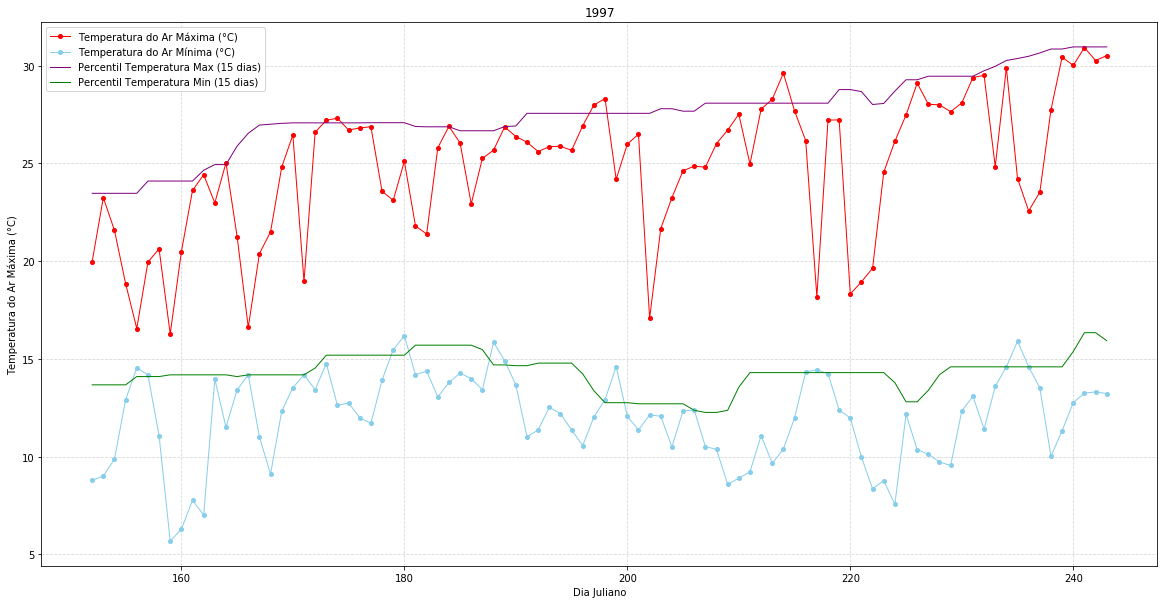

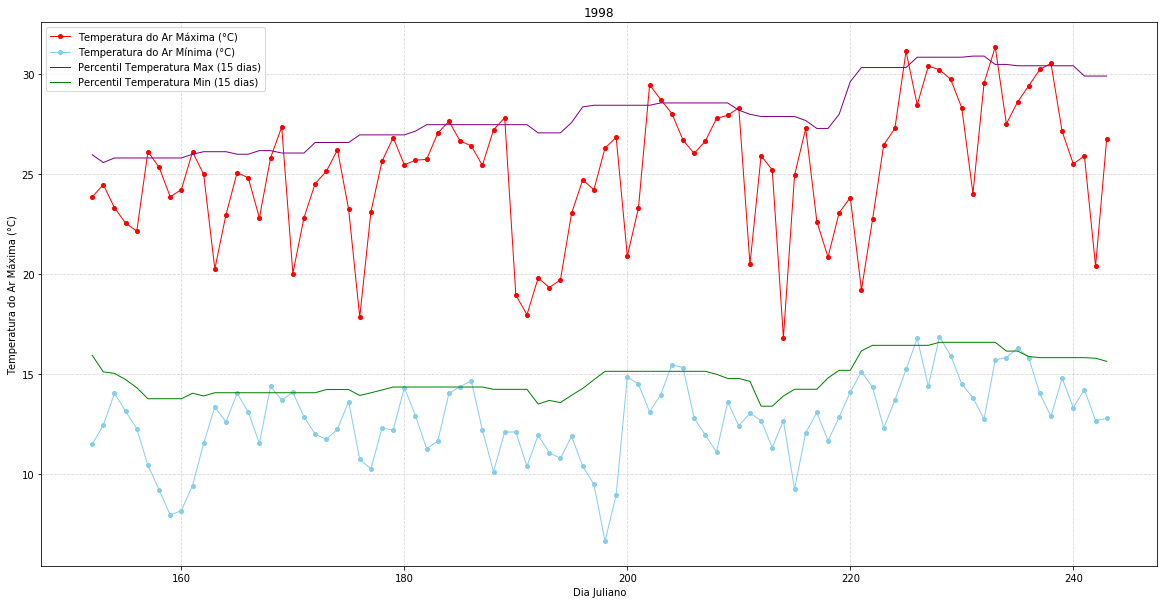

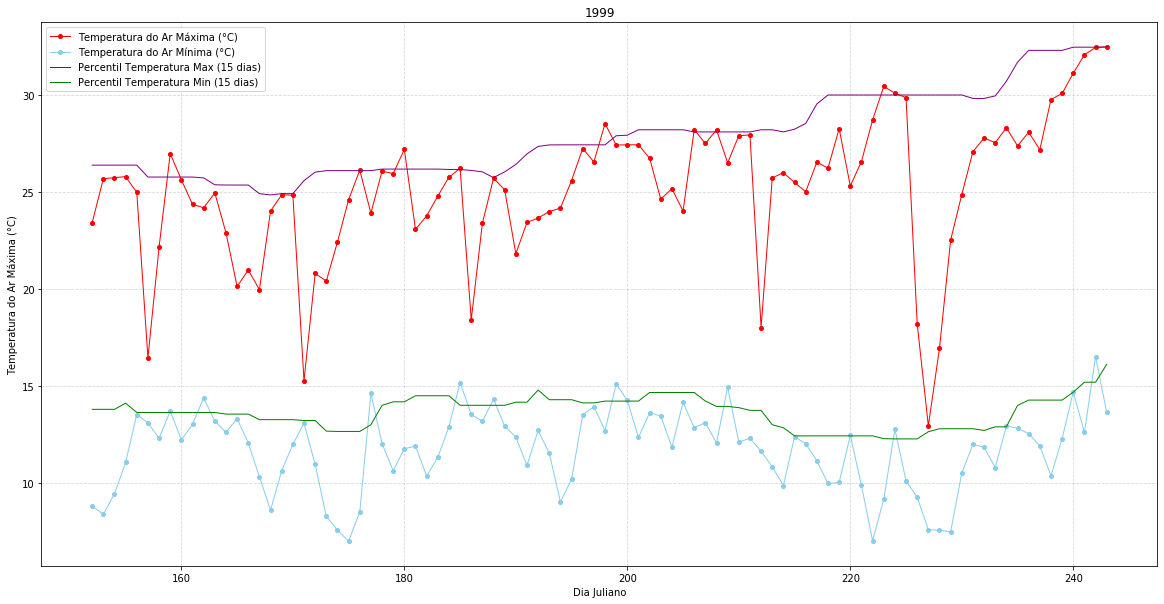

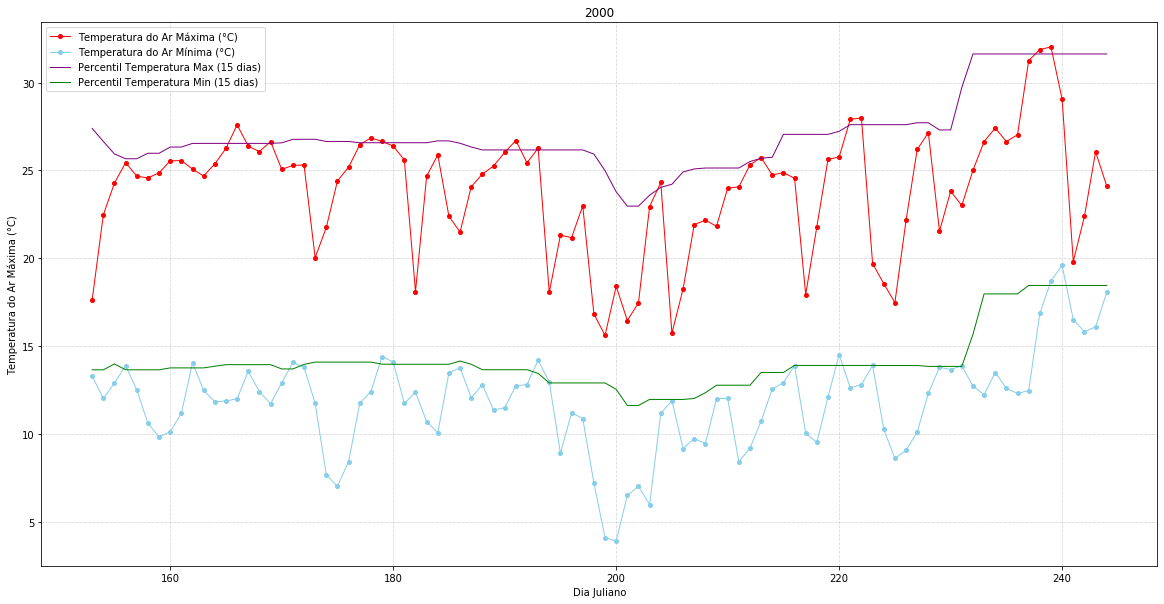

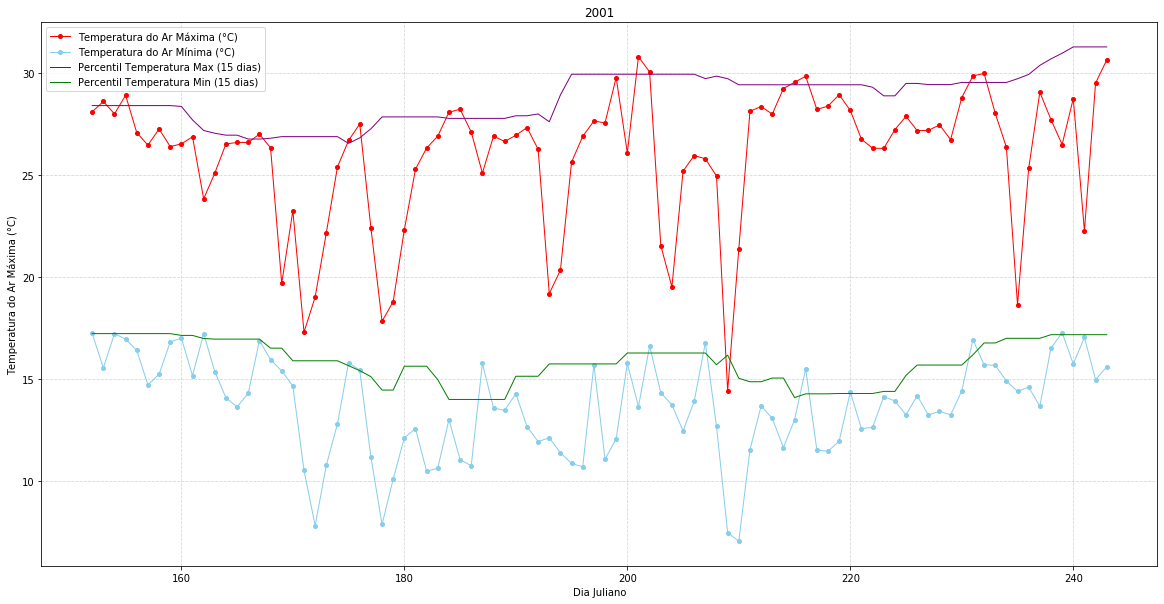

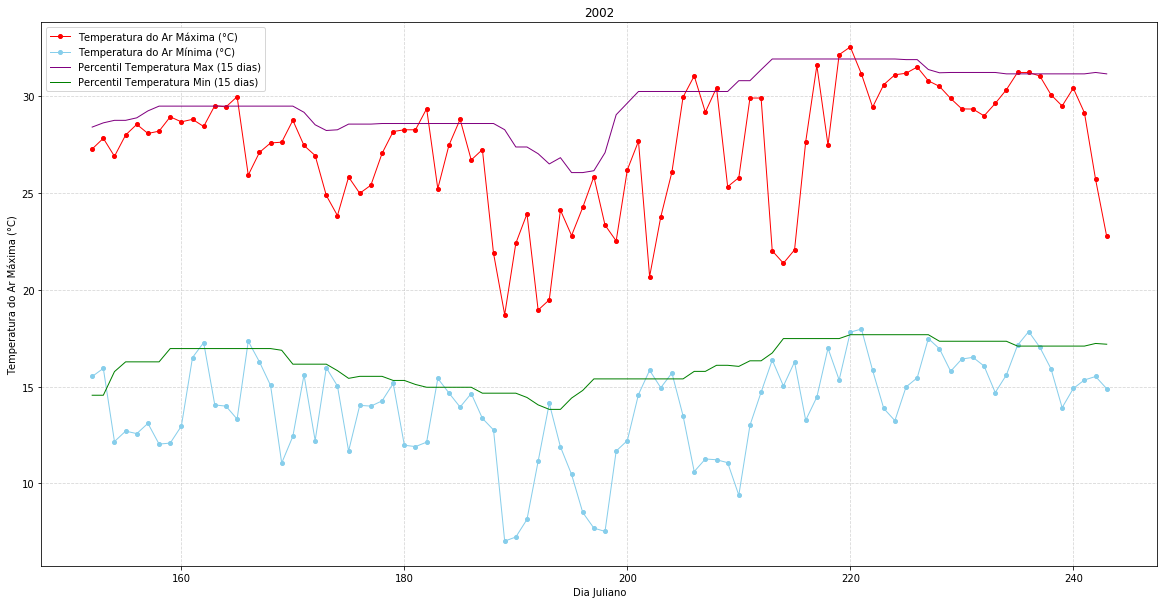

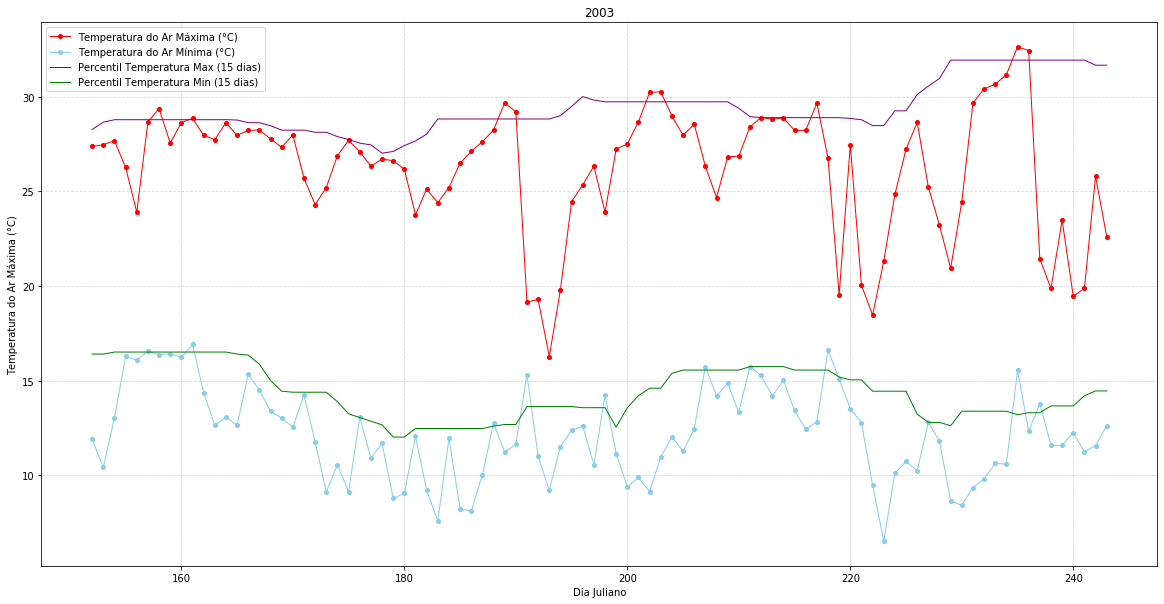

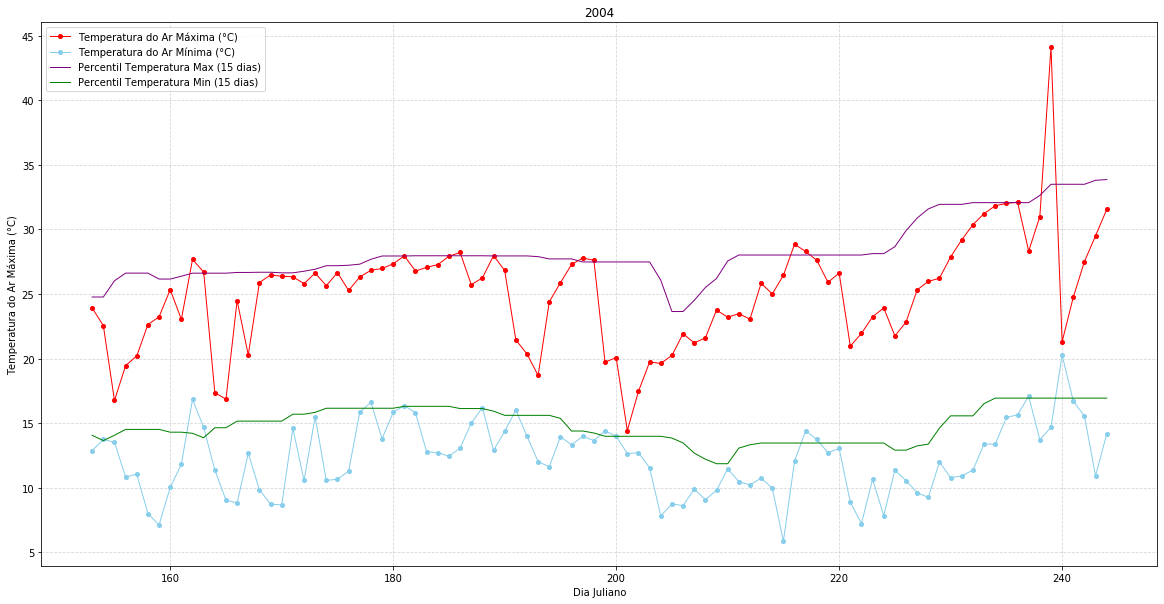

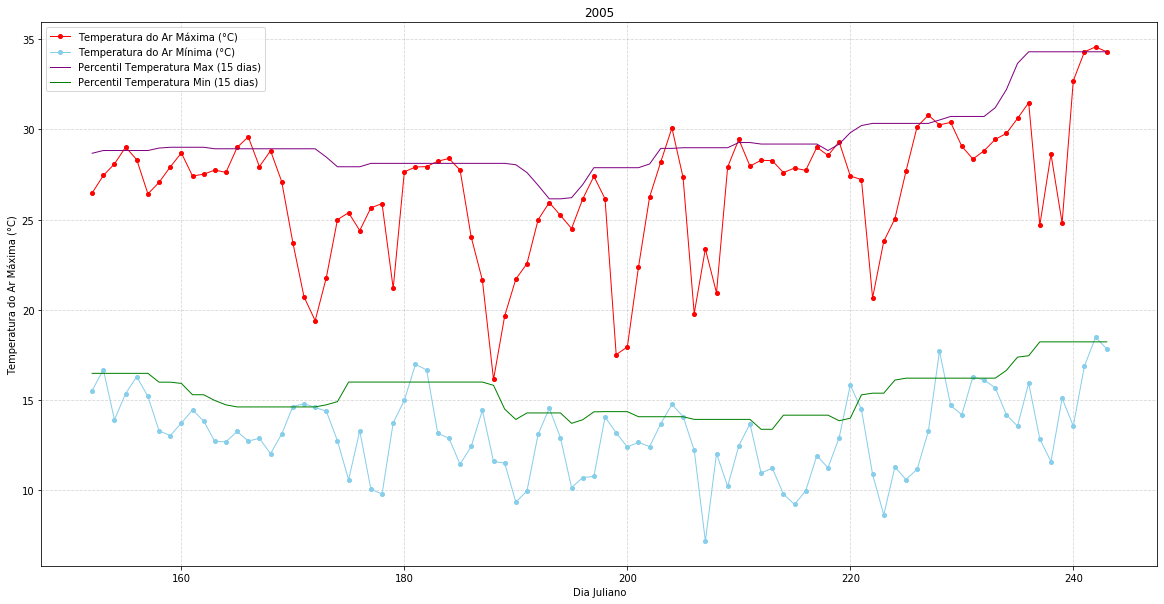

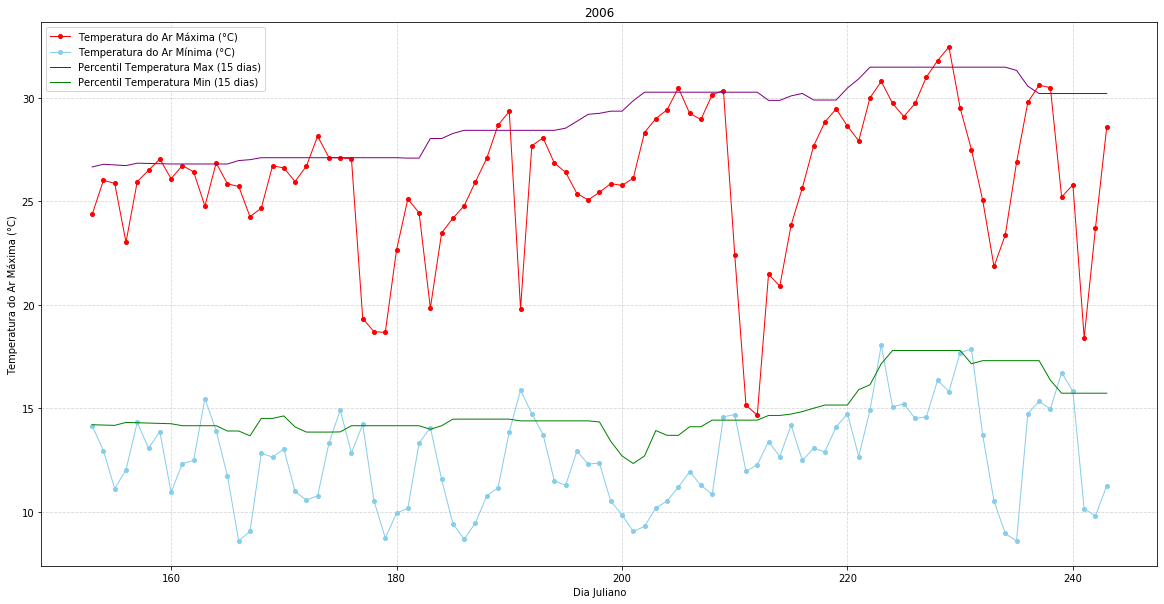

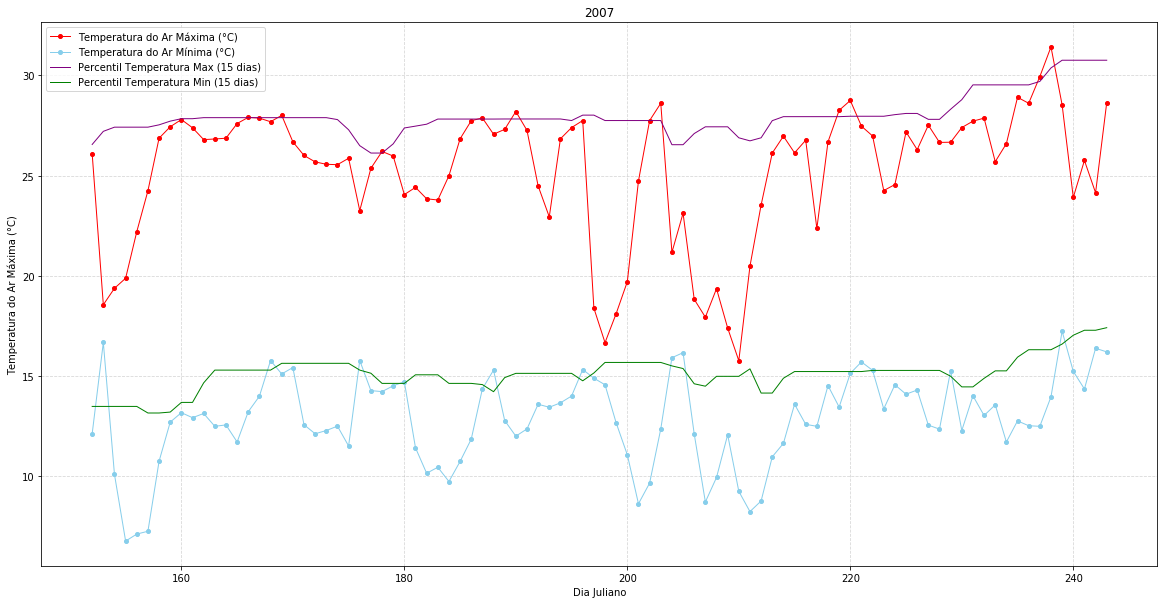

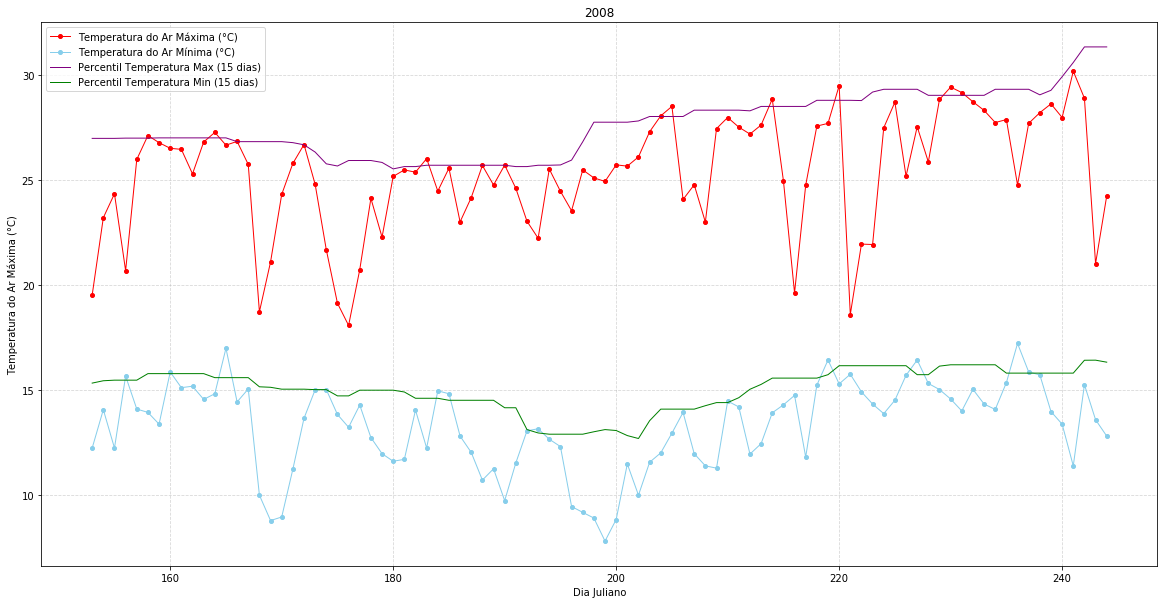

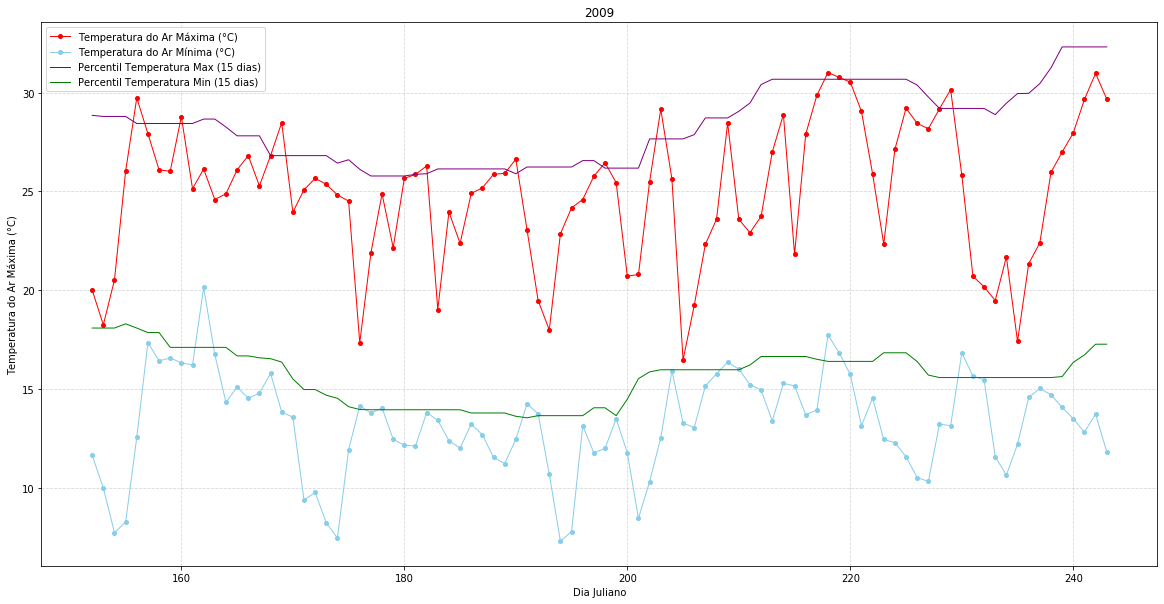

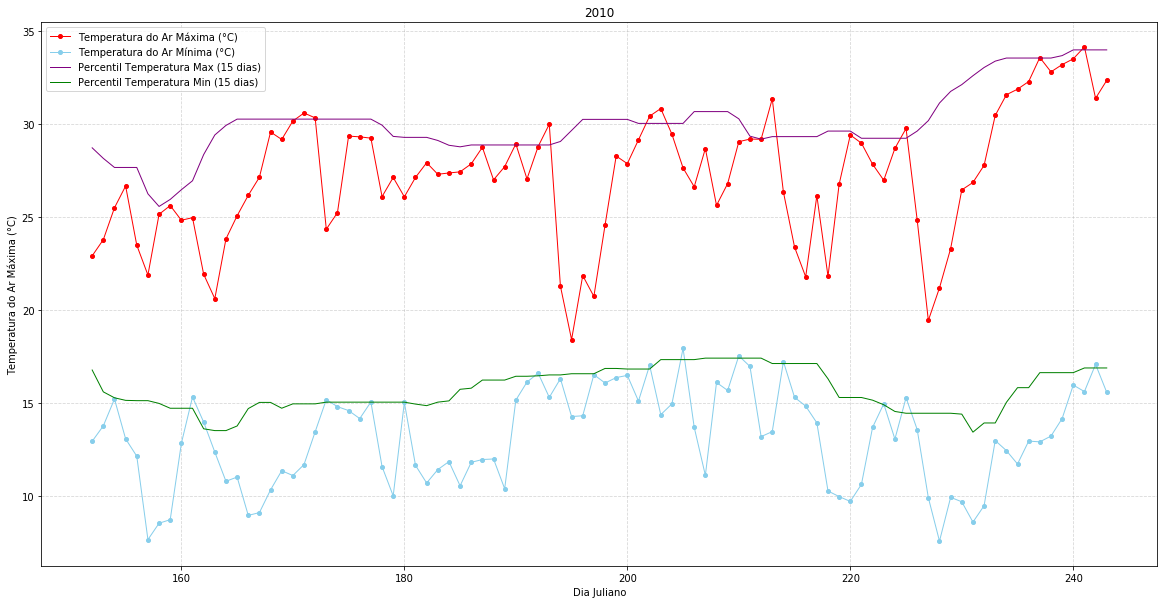

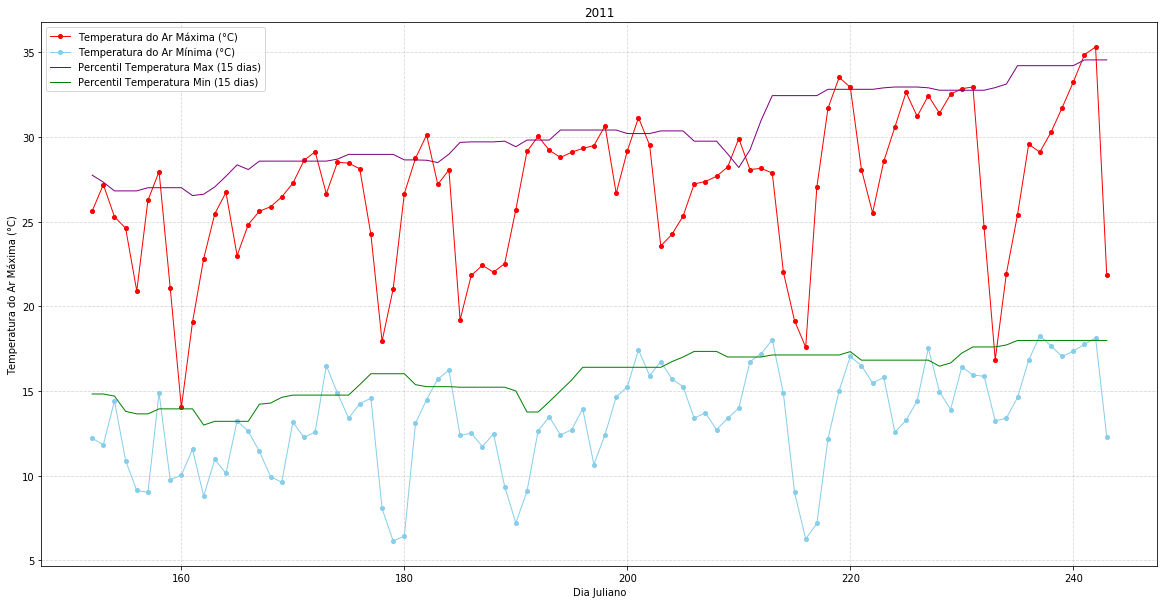

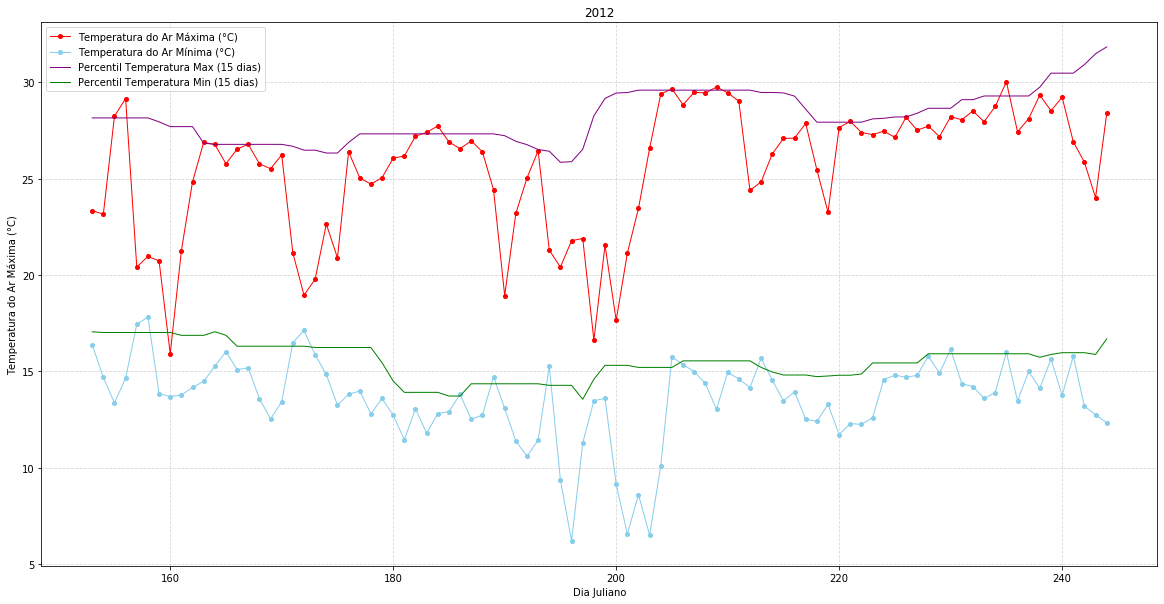

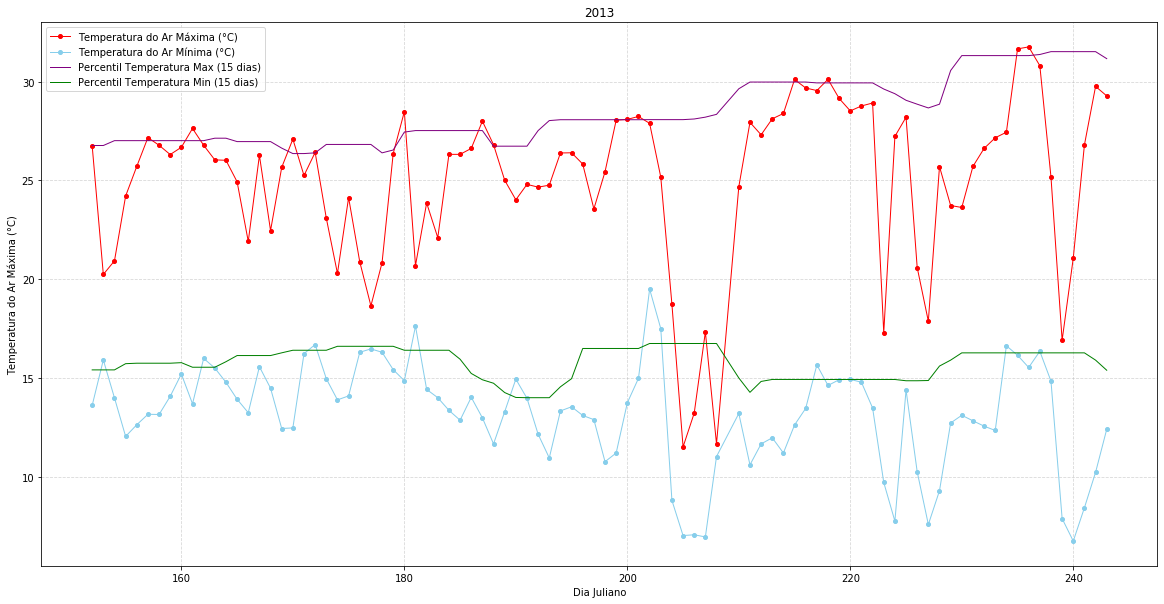

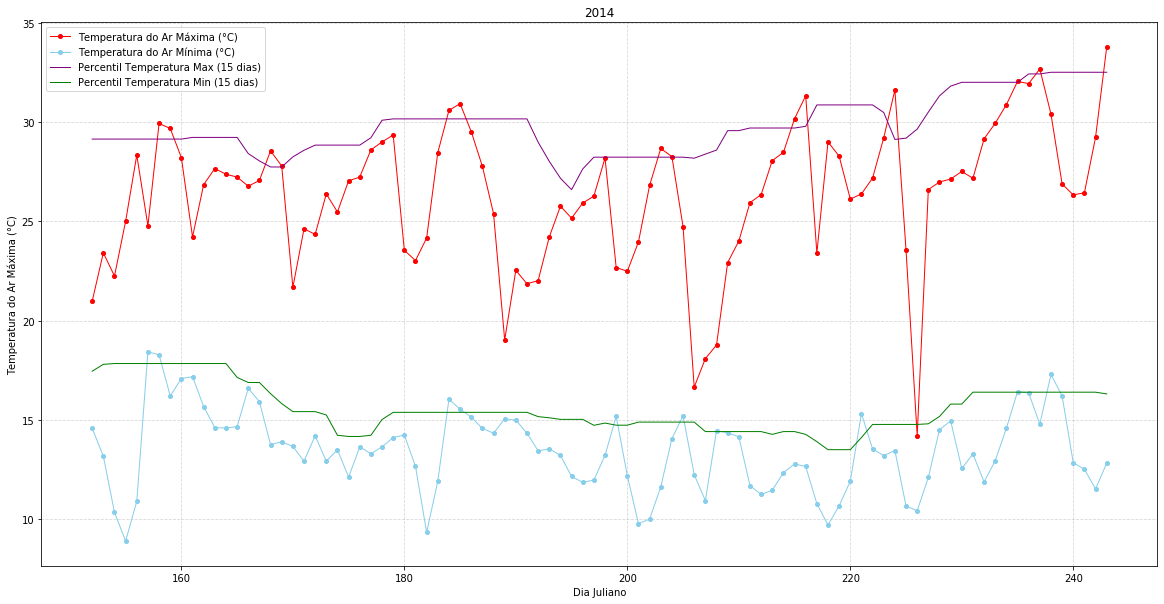

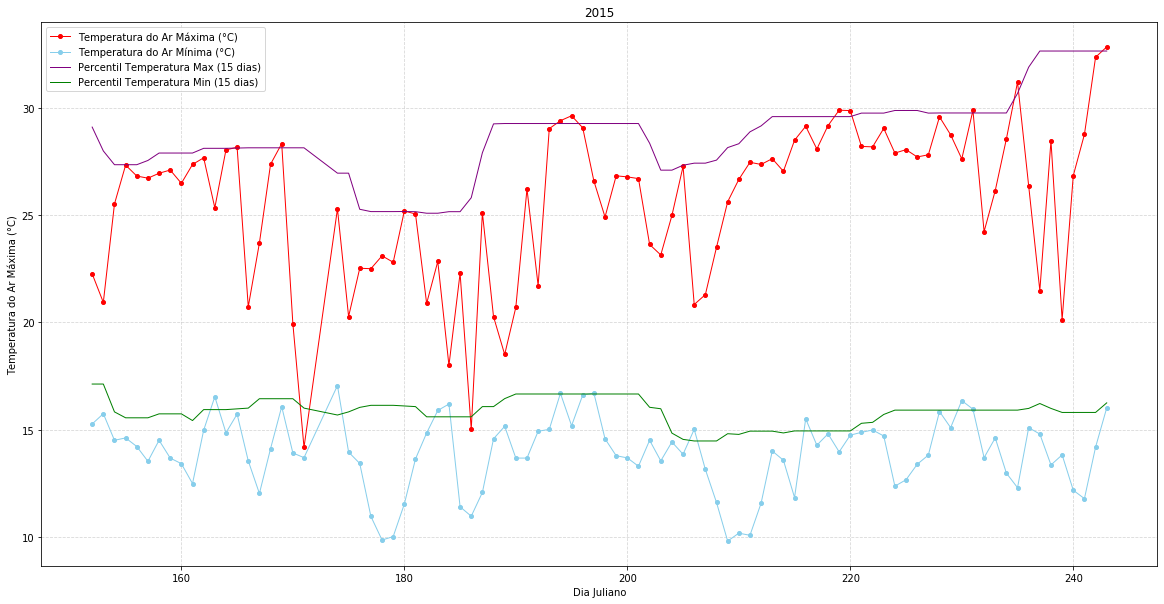

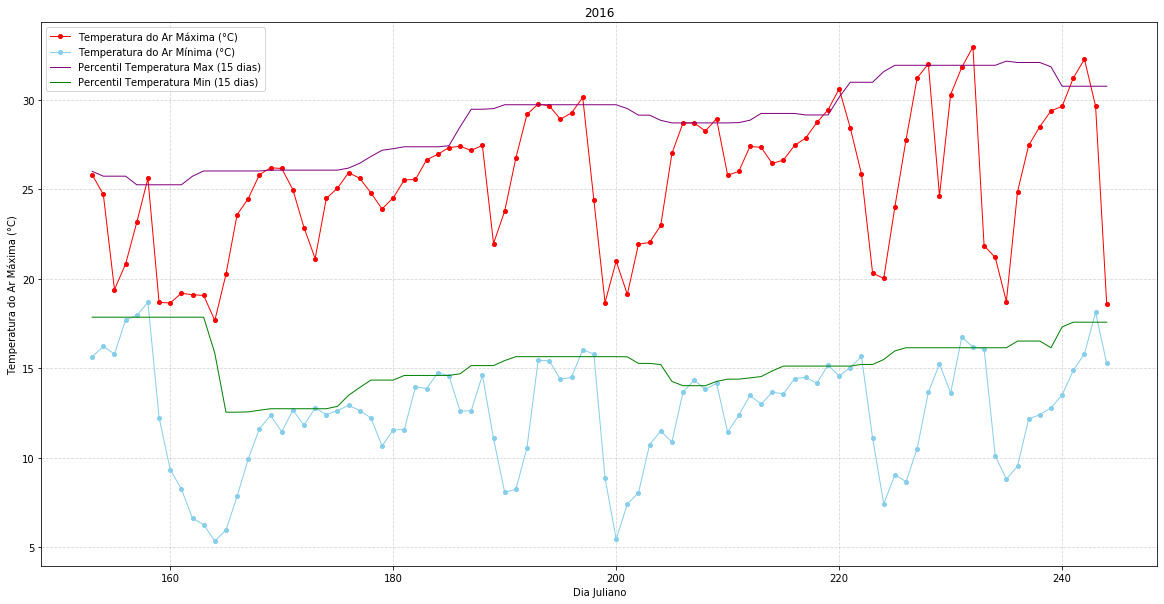

In [27]:
min_x_value = daily_analysis_data_frame[_MAX_TEMP_COLUMN].min() - 5
max_x_value = daily_analysis_data_frame[_MAX_TEMP_COLUMN].max() + 5

min_y_value = daily_analysis_data_frame[_DAY_OF_YEAR_COLUMN].min() - 5
max_y_value = daily_analysis_data_frame[_DAY_OF_YEAR_COLUMN].max() + 5

for i in daily_analysis_data_frame[_YEAR_COLUMN].unique():
    data_2plot = daily_analysis_data_frame[(daily_analysis_data_frame[_YEAR_COLUMN] == i)]
#     data_2plot = data_2plot[data_2plot[_DAY_OF_YEAR_COLUMN]>=200]
#     data_2plot = data_2plot[data_2plot[_DAY_OF_YEAR_COLUMN]<=250]
    data_2plot = data_2plot[data_2plot[_SEASON_COLUMN]==_SEASON_WINTER]
    
    plt.figure(figsize=(20,10))
    plt.title(str(i))    
    plt.plot( _DAY_OF_YEAR_COLUMN, _MAX_TEMP_COLUMN, data=data_2plot, color='red', linewidth=1,marker='o', markerfacecolor='red', markersize=4)
    plt.plot( _DAY_OF_YEAR_COLUMN, _MIN_TEMP_COLUMN, data=data_2plot, color='skyblue', linewidth=1,marker='o', markerfacecolor='skyblue', markersize=4)
    plt.plot( _DAY_OF_YEAR_COLUMN, _QUANTILE_MAX_TEMP_FIFTEEN_DAYS_COLUMN, data=data_2plot, color='purple', linewidth=1)
    plt.plot( _DAY_OF_YEAR_COLUMN, _QUANTILE_MIN_TEMP_FIFTEEN_DAYS_COLUMN, data=data_2plot, color='green', linewidth=1)
    plt.legend()
    plt.xlabel(_DAY_OF_YEAR_COLUMN)
    plt.ylabel(_MAX_TEMP_COLUMN)
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.show()